### Regression ensembling

In [1]:
import pandas as pd
import numpy as np

test = pd.read_csv('log/ensemble/test_true.csv')['Prediction']
# bfm_preds = pd.read_csv('log/ensemble/bfm_preds.csv')['Prediction']
# als_preds = pd.read_csv('log/ensemble/als_preds.csv')['Prediction']
# funk_pred = pd.read_csv('log/ensemble/funk_preds.csv')['Prediction']
sim_preds2 = pd.read_csv('log/ensemble/sim_preds_w_none_n_30.csv')['Prediction']
sim_preds3 = pd.read_csv('log/ensemble/sim_preds_w_none_n_10000.csv')['Prediction']
sim_preds4 = pd.read_csv('log/ensemble/sim_preds_w_normal_n_30.csv')['Prediction']
sim_preds5 = pd.read_csv('log/ensemble/sim_preds_w_normal_n_10000.csv')['Prediction']
sim_preds6 = pd.read_csv('log/ensemble/sim_preds_w_normal_n_30_improved.csv')['Prediction']
sim_cosine = pd.read_csv('log/ensemble/sim_cosine.csv')['Prediction']
bfm1 = pd.read_csv('log/ensemble/bfm_preds_.csv')['Prediction']
bfm2 = pd.read_csv('log/ensemble/bfm_preds_ii.csv')['Prediction']
bfm3= pd.read_csv('log/ensemble/bfm_preds_iu_ii.csv')['Prediction']
bfm4= pd.read_csv('log/ensemble/bfm_preds_iu.csv')['Prediction']
bfm5 = pd.read_csv('log/ensemble/bfm_preds_ord_ii.csv')['Prediction']
bfm6 = pd.read_csv('log/ensemble/bfm_preds_ord_iu.csv')['Prediction']
bfm7 = pd.read_csv('log/ensemble/bfm_preds_ord.csv')['Prediction']
bfm8 = pd.read_csv('log/ensemble/bfm_preds_ord_iu_ii.csv')['Prediction']
# sim_sigra = pd.read_csv('log/ensemble/sim_sigra.csv')['Prediction']
# deeprec = pd.read_csv('log/ensemble/deeprec.csv')['Prediction']
# deeprec300 = pd.read_csv('log/ensemble/deeprec_300.csv')['Prediction']

In [2]:
import numpy as np

X = np.stack((bfm1, bfm2, bfm3, bfm4, bfm5, bfm6, bfm7, bfm8, sim_preds4, sim_preds3, sim_preds2, sim_preds5, sim_preds6), axis=1)
y = test.values
print(X.shape, y.shape)

(235391, 13) (235391,)


In [3]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
results, names = [], []

models = {
    "LinearReg" : LinearRegression(),
    "Lasso" : Lasso(alpha=0.001),
    "Ridge" : Ridge(alpha=0.01),
    "XGBoost" : XGBRegressor(n_estimators=100, max_depth=7, n_jobs=-1),
    'MLP' : MLPRegressor(random_state=42, max_iter=1000),
    'RF' : RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-1),
}

LinearReg : 0.968703 (0.002044) Coef: -0.12417 0.31809 0.35167 -0.26340 0.20473 -0.01605 -0.28772 0.70738 -0.04782 -0.67399 0.10244 0.56205 0.14736
Lasso : 0.969304 (0.002012) Coef: -0.00000 0.11723 0.12836 -0.00000 0.00000 0.00000 -0.00000 0.66494 0.12595 -0.06318 0.00000 -0.00000 0.02134
Ridge : 0.968703 (0.002044) 
XGBoost : 0.979377 (0.002036) 
MLP : 0.970320 (0.002473) 
RF : 0.983676 (0.002287) 


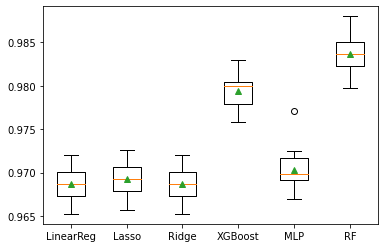

In [4]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
    if(name == "LinearReg"): model.fit(X, y) 
    if(name == "Lasso"): model.fit(X, y) 
    results.append((-scores))
    names.append(name)
    print(name, ': %.6f (%.6f)' % (np.mean(-scores), np.std(-scores)), "Coef: " + " ".join(["%0.5f" % x for x in model.coef_]) if name == "LinearReg" or name == "Lasso" else "")

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

Feature evaluation
| Models | rmse | std|
|---|---|---|
|BFM|0.97020|0.00205|
| all BFM| 0.96981| 0.00205|
|BFM + PCC_30|0.96968|0.00203|
|BFM + all_PCC| 0.96939|  0.00206 |
|BFM + PCC_30 + SiGra + Cosine| 0.96956|  0.00204 |   
| BFM + all_similarities | 0.96940 | 0.00206|
|BFM + DeepRec + PCC_30 | 0.96969 | 0.00203 |
| all_BFM + all_similarities | **0.96870** | 0.00204|

Regression models comparison

| Models | rmse | std|
|---|---|---|
| Linear Regression | **0.96870** | 0.00204|
| Lasso| 0.96930| 0.00201|
|Ridge|0.96870|0.00204|
|XGBoost| 0.97937|  0.00203 |
|MLP| 0.97032|  0.00203|   
| RF | 0.98367 | 0.00228|

## Generate final submission
Load test data.

In [5]:
from utils.utils import generate_submission

sim_preds2 = pd.read_csv('log/ensemble_test/sim_preds_w_none_n_30.csv')['Prediction']
sim_preds3 = pd.read_csv('log/ensemble_test/sim_preds_w_none_n_10000.csv')['Prediction']
sim_preds4 = pd.read_csv('log/ensemble_test/sim_preds_w_normal_n_30.csv')['Prediction']
sim_preds5 = pd.read_csv('log/ensemble_test/sim_preds_w_normal_n_10000.csv')['Prediction']
sim_preds6 = pd.read_csv('log/ensemble_test/sim_preds_w_normal_n_30_improved.csv')['Prediction']
bfm1 = pd.read_csv('log/ensemble_test/bfm_preds__sub.csv')['Prediction']
bfm2 = pd.read_csv('log/ensemble_test/bfm_preds_ii_sub.csv')['Prediction']
bfm3= pd.read_csv('log/ensemble_test/bfm_preds_iu_ii_sub.csv')['Prediction']
bfm4= pd.read_csv('log/ensemble_test/bfm_preds_iu_sub.csv')['Prediction']
bfm5 = pd.read_csv('log/ensemble_test/bfm_preds_ord_ii_sub.csv')['Prediction']
bfm6 = pd.read_csv('log/ensemble_test/bfm_preds_ord_iu_sub.csv')['Prediction']
bfm7 = pd.read_csv('log/ensemble_test/bfm_preds_ord_sub.csv')['Prediction']
bfm8 = pd.read_csv('log/ensemble_test/bfm_preds_ord_iu_ii_sub.csv')['Prediction']

Define the regression model and fit it with training data.

In [6]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

Predict results for test data.

In [7]:
X_test = np.stack((bfm1, bfm2, bfm3, bfm4, bfm5, bfm6, bfm7, bfm8, sim_preds4, sim_preds3, sim_preds2, sim_preds5, sim_preds6), axis=1)
regressor_preds = regressor.predict(X_test)

Save the final submissions.

In [8]:
generate_submission(regressor_preds, 'data/sampleSubmission.csv', name="final_ensemble.zip")

Submit to Kaggle.

In [9]:
from utils.utils import submit_on_kaggle
submit_on_kaggle(name="final_ensemble.zip", message="all BFM + all similarities ensemble real")

100%|██████████| 5.61M/5.61M [00:14<00:00, 402kB/s] 


Successfully submitted to ETHZ CIL Collaborative Filtering 2022